## Spatial Data Analysis --- Geopandas

### Data

The data I am using for module-07 is from the [data on African conflict](https://www.acleddata.com/data/) provided by [The Armed Conflict Location & Event Data Project (ACLED)](https://www.acleddata.com/about-acled/). I originally downloaded and wrangled the data in modules 03 and 04. I have a cleaned csv of the original file and a csv of number of fatalities per country per year. 

In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# change default figsize 
plt.rcParams['figure.figsize'] = (15.0, 12.0) # added decimals in

In [2]:
# load in csv data using pandas
conflicts = pd.read_csv('./data/africa_conflict_cleaned.csv')
fatalities = pd.read_csv('./data/fatalities_per_year.csv')

# check
fatalities.head()

,Unnamed: 0,FATALITIES,FATALITIES.1,FATALITIES.2,FATALITIES.3,FATALITIES.4,FATALITIES.5,FATALITIES.6,FATALITIES.7,FATALITIES.8,...,FATALITIES.12,FATALITIES.13,FATALITIES.14,FATALITIES.15,FATALITIES.16,FATALITIES.17,FATALITIES.18,FATALITIES.19,FATALITIES.20,FATALITIES.21
0,YEAR,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
1,COUNTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,3579.0,1269.0,369.0,1381.0,945.0,1007.0,630.0,262.0,254.0,...,520.0,245.0,325.0,248.0,341.0,243.0,154.0,129.0,146.0,31.0
3,Angola,5262.0,50855.0,73979.0,3968.0,9156.0,268.0,6.0,33.0,3.0,...,5.0,15.0,4.0,6.0,6.0,0.0,23.0,115.0,67.0,11.0
4,Benin,0.0,1.0,0.0,1.0,4.0,0.0,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,22.0,15.0,24.0


CSV data are now loaded in as dfs. Conflicts has geometry, which means I can convert it to a geodf like we did earlier in the lesson with the toxic release inventory. Fatalities does not have geometry yet. For that data set, I need to do a spatial join using with geoms for African countries.

In [3]:
# convert conflicts df to gdf
# first, convert lat and lon to shapely geometries using Point
# remember that lon is the x and lat is the y
geoms = [Point(xy) for xy in zip(conflicts.LONGITUDE, conflicts.LATITUDE)]
conflicts_mod = conflicts.drop(['LATITUDE', 'LONGITUDE'], axis=1)
conflicts_mod = conflicts_mod.drop(conflicts_mod.columns[0], axis=1)

# define crs
crs = {'init' :'epsg:4326'}

# create gdf
conflicts_geo = gpd.GeoDataFrame(conflicts_mod, crs=crs, geometry=geoms)

# check
conflicts_geo.head()

,YEAR,COUNTRY,LOCATION,EVENT_TYPE,INTERACTION,NOTES,FATALITIES,geometry
0,1997,Algeria,Douaouda,Violence against civilians,27,5 January: Beheading of 5 citizens in Douaouda...,5,POINT (2.7894 36.6725)
1,1997,Algeria,Hassasna,Violence against civilians,27,Two citizens were beheaded in Hassasna.,2,POINT (0.8833 36.1333)
2,1997,Algeria,Hassi El Abed,Violence against civilians,27,Two citizens were killed in a raid on the vill...,2,POINT (-0.2903 34.9664)
3,1997,Algeria,Blida,Violence against civilians,27,4 January: 16 citizens were murdered in the vi...,16,POINT (2.8289 36.4686)
4,1997,Algeria,Douaouda,Violence against civilians,27,5 January: Killing of 18 citizens in the Olivi...,18,POINT (2.7894 36.6725)


In [4]:
# load in countries json as gdf
countries = gpd.read_file('./data/countries.json')
countries

,id,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,POLYGON ((31.28789062500002 -22.40205078125001...
1,1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,(POLYGON ((-60.82119140624999 9.13837890624999...
5,5,Admin-0 country,6,6,Vatican,VAT,0,2,Sovereign country,Vatican,...,바티칸 시국,Vaticaanstad,Watykan,Vaticano,Ватикан,Vatikanstaten,Vatikan,Thành Vatican,梵蒂冈,"POLYGON ((12.43916015625001 41.898388671875, 1..."
6,6,Admin-0 country,1,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,...,바누아투,Vanuatu,Vanuatu,Vanuatu,Вануату,Vanuatu,Vanuatu,Vanuatu,萬那杜,"(POLYGON ((166.74580078125 -14.82685546875001,..."
7,7,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,Uzbekistan,...,우즈베키스탄,Oezbekistan,Uzbekistan,Usbequistão,Узбекистан,Uzbekistan,Özbekistan,Uzbekistan,乌兹别克斯坦,"(POLYGON ((70.94677734375 42.24868164062499, 7..."
8,8,Admin-0 country,1,4,Uruguay,URY,0,2,Sovereign country,Uruguay,...,우루과이,Uruguay,Urugwaj,Uruguai,Уругвай,Uruguay,Uruguay,Uruguay,乌拉圭,"POLYGON ((-53.37060546875 -33.7421875, -53.419..."
9,9,Admin-0 country,3,6,Federated States of Micronesia,FSM,0,2,Sovereign country,Federated States of Micronesia,...,미크로네시아 연방,Micronesia,Mikronezja,Micronésia,Микронезия,Mikronesiens federerade stater,Mikronezya,Micronesia,密克罗尼西亚联邦,"(POLYGON ((162.983203125 5.325732421874989, 16..."


In [5]:
# prep a geom gdf for joining by selecting only relevant columns
countries_geom = countries[['ADMIN', 'geometry']]

# write data to file
countries_geom.to_file('./data/countries_geom.json')

# check
countries_geom.head()

,ADMIN,geometry
0,Zimbabwe,POLYGON ((31.28789062500002 -22.40205078125001...
1,Zambia,"POLYGON ((30.39609375000001 -15.64306640625, 3..."
2,Yemen,"(POLYGON ((53.08564453125001 16.648388671875, ..."
3,Vietnam,"(POLYGON ((104.06396484375 10.3908203125, 104...."
4,Venezuela,(POLYGON ((-60.82119140624999 9.13837890624999...


In [6]:
# further format fatalities 
fatalities_dropped = fatalities.drop(fatalities.index[[0,1]])
type(fatalities_dropped)
fatalities_dropped

fatalities_clean = fatalities_dropped.rename(index=str, columns={'Unnamed: 0': 'ADMIN'}, inplace=True)

# why does trying to rename this unnamed country column change the dataframe to NoneType?
# I've been googling around trying to figure this out for a while and nothing

In [7]:
# merge dataframes together using 'ADMIN' as the key
# inner joins means geoms for non-africa countries are not included
#merged = countries_geom.merge(fatalities, on='ADMIN', how='inner')
#merged.head()


# didn't work, because name of column in both sets needs to be the same
# change one and try again later

## Mapping Begins

Running into a major problem with my fatalities data, so going back to the conflicts data for now.

In [8]:
# look at it again to remind myself what's in it
conflicts_geo

,YEAR,COUNTRY,LOCATION,EVENT_TYPE,INTERACTION,NOTES,FATALITIES,geometry
0,1997,Algeria,Douaouda,Violence against civilians,27,5 January: Beheading of 5 citizens in Douaouda...,5,POINT (2.7894 36.6725)
1,1997,Algeria,Hassasna,Violence against civilians,27,Two citizens were beheaded in Hassasna.,2,POINT (0.8833 36.1333)
2,1997,Algeria,Hassi El Abed,Violence against civilians,27,Two citizens were killed in a raid on the vill...,2,POINT (-0.2903 34.9664)
3,1997,Algeria,Blida,Violence against civilians,27,4 January: 16 citizens were murdered in the vi...,16,POINT (2.8289 36.4686)
4,1997,Algeria,Douaouda,Violence against civilians,27,5 January: Killing of 18 citizens in the Olivi...,18,POINT (2.7894 36.6725)
5,1997,Algeria,Ain Benian,Battle-No change of territory,12,4 armed men were killed by security forces in ...,4,POINT (2.9219 36.8028)
6,1997,Algeria,Hadjout,Violence against civilians,27,6 January: 23 citizens were horribly mutilated...,23,POINT (2.4178 36.5139)
7,1997,Algeria,Ain Fakroun,Remote violence,27,Explosion of a bomb in Ain Fakroun (Oum Bouagh...,7,POINT (6.8737 35.9711)
8,1997,Algeria,Algiers,Remote violence,27,7 January: Explosion of a bomb in the Didouche...,20,POINT (3.042 36.7525)
9,1997,Algeria,Douaouda,Battle-No change of territory,12,Clashes between the military and militants in ...,0,POINT (2.7894 36.6725)


In [9]:
# load in africa countries data
africa_countries = gpd.read_file('./data/africa_countries.json')

In [10]:
# check current crs's of data
print(conflicts_geo.crs, africa_countries.crs)

# both are in WGS84

{'init': 'epsg:4326'} {'init': 'epsg:4326'}


In [11]:
# project the data
# this projection is the Africa Albers Equal Area Conic 
# it's in meters
proj_params = '+proj=aea +lat_1=20 +lat_2=-23 +lat_0=0 +lon_0=25 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs '

countries_projected = africa_countries.to_crs(proj_params)
conflicts_projected = conflicts_geo.to_crs(proj_params)

In [12]:
# pull out conflicts from 2018
data_2018_projected = conflicts_projected.loc[conflicts_projected['YEAR'] == 2018]
data_2018_projected.head()

,YEAR,COUNTRY,LOCATION,EVENT_TYPE,INTERACTION,NOTES,FATALITIES,geometry
4948,2018,Algeria,Ain El Hammam,Riots/Protests,60,Parents and pupils assembled in front of the o...,0,POINT (-2182909.853791419 4016681.923783503)
4949,2018,Algeria,Biskra,Riots/Protests,60,Following the non-renewal of the contract of a...,0,POINT (-2029403.10434414 3854490.162624898)
4950,2018,Algeria,Algiers,Violence against civilians,16,Algerian police violently dispersed a sit-in b...,0,POINT (-2313943.942901789 4033080.450629215)
4951,2018,Algeria,Sougueur,Riots/Protests,60,Unemployed Algerians protested in front of the...,0,POINT (-2475357.470458027 3882669.954901396)
4952,2018,Algeria,Ain El Hammam,Riots/Protests,60,Parents and pupils assembled in front of the o...,0,POINT (-2182909.853791419 4016681.923783503)


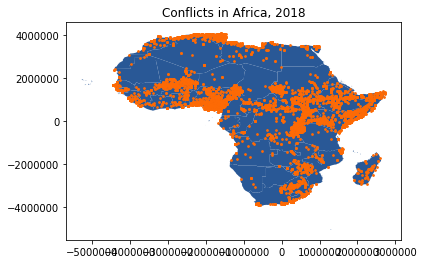

In [18]:
fig, ax = plt.subplots()

title='Conflicts in Africa, 2018'
ax.set(title=title)

countries_projected.plot(ax=ax, color='#295896', linewidth=.4, zorder=1);
data_2018_projected.plot(ax=ax, color='#fd6a05', zorder=2, markersize=3);

# it's kind of working, but it looks terrible. Also, the default figure size settings up top aren't working.

In [21]:
# I'll try again with a different projection
# this time Lambert Azimuthal Equal Area
proj_params_2 = '+proj=laea +lat_0=45.5 +lon_0=-114.125 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs'

countries_projected_2 = africa_countries.to_crs(proj_params_2)
conflicts_projected_2 = data_2018_projected.to_crs(proj_params_2)

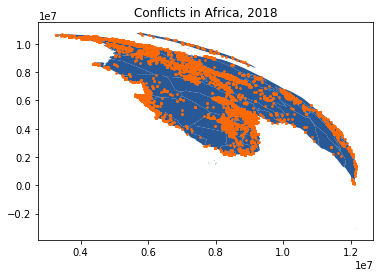

In [22]:
fig, ax = plt.subplots()

title='Conflicts in Africa, 2018'
ax.set(title=title)

countries_projected_2.plot(ax=ax, color='#295896', linewidth=.4, zorder=1);
conflicts_projected_2.plot(ax=ax, color='#fd6a05', zorder=2, markersize=3);

# what the hell